In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
CA_df = pd.read_csv("CA/ca.csv")

In [3]:
CA_df["DATE"] = pd.to_datetime(CA_df["DATE"], format="%Y-%m-%d %H:%M:%S")

In [4]:
CA_df.head()

,DATE,STATUS,QLANG,DEM_GENDER,DEM_AGE,DEM_ABOR,DEM_ABOR_TYPE,DEM_STDNT,DEM_VET,DEM_HEALTH,...,FENT_NMU_NTY,HYD_NMU_NTY,HYDM_NMU_NTY,METH_NMU_NTY,MORPH_NMU_NTY,OXY_NMU_NTY,OXYM_NMU_NTY,SUF_NMU_NTY,TAP_NMU_NTY,TRAM_NMU_NTY
0,2017-09-28 18:13:25,3,1,1,18,0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-10-18 18:46:34,3,1,1,18,0,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-09-29 06:58:50,3,1,1,24,0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-10-03 17:58:19,3,1,1,16,0,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-10-25 21:09:49,3,1,1,21,0,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
US_df = pd.read_csv('US/us_18Q1.csv')
US_df.head()

,DATE,STATUS,DEM_GENDER,DEM_AGE,DEM_STDNT,DEM_VET,DEM_HEALTH,DEM_POSTAL,DEM_HISPANIC,DEM_RACE,...,FENT_NMU_NTY,HYD_NMU_NTY,HYDM_NMU_NTY,METH_NMU_NTY,MORPH_NMU_NTY,OXY_NMU_NTY,OXYM_NMU_NTY,SUF_NMU_NTY,TAP_NMU_NTY,TRAM_NMU_NTY
0,2018-04-05 20:19:43,3,2,59,0,0,0,64,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2018-04-05 20:52:46,3,2,59,0,0,1,919,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2018-05-18 17:20:27,3,1,60,0,0,0,970,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2018-05-07 17:40:08,3,1,57,0,0,0,705,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2018-04-25 10:44:36,3,1,79,0,1,0,532,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
CA_df.dtypes

DATE            datetime64[ns]
STATUS                   int64
QLANG                    int64
DEM_GENDER               int64
DEM_AGE                  int64
                     ...      
OXY_NMU_NTY              int64
OXYM_NMU_NTY             int64
SUF_NMU_NTY              int64
TAP_NMU_NTY              int64
TRAM_NMU_NTY             int64
Length: 185, dtype: object

(array([ 707.,  923., 1355., 1114., 1562., 2216., 1545.,  535.,   47.,
           3.]),
 array([15. , 23.4, 31.8, 40.2, 48.6, 57. , 65.4, 73.8, 82.2, 90.6, 99. ]),
 <a list of 10 Patch objects>)

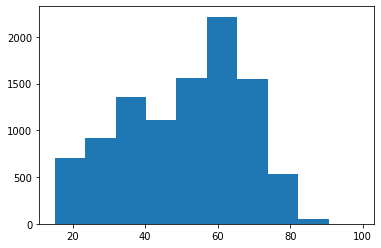

In [6]:
plt.hist(CA_df['DEM_AGE'])

In [7]:
distr_vals = pd.value_counts(CA_df['DAST_CAT']).to_frame().reset_index()
distr_vals

,index,DAST_CAT
0,1,5050
1,2,4167
2,3,582
3,4,160
4,5,48


<BarContainer object of 5 artists>

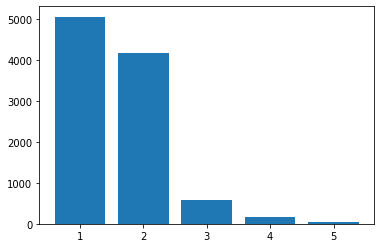

In [8]:
plt.bar(distr_vals['index'], distr_vals['DAST_CAT'])

In [9]:
df_dem = CA_df.copy()
cols_to_keep = list(df_dem.columns)[:26]
df_dem = df_dem[cols_to_keep]
df_dem.head()

,DATE,STATUS,QLANG,DEM_GENDER,DEM_AGE,DEM_ABOR,DEM_ABOR_TYPE,DEM_STDNT,DEM_VET,DEM_HEALTH,...,DEM_PREG,DEM_PREGMNTH,HEALTH_SETTING_PRE,HEALTH_SETTING_HOS,HEALTH_SETTING_OUT,HEALTH_SETTING_HOME,HEALTH_SETTING_PRIV,HEALTH_SETTING_OTH,HEALTH_ROLE,HEALTH_RX
0,2017-09-28 18:13:25,3,1,1,18,0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-10-18 18:46:34,3,1,1,18,0,NaN,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-09-29 06:58:50,3,1,1,24,0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-10-03 17:58:19,3,1,1,16,0,NaN,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-10-25 21:09:49,3,1,1,21,0,NaN,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


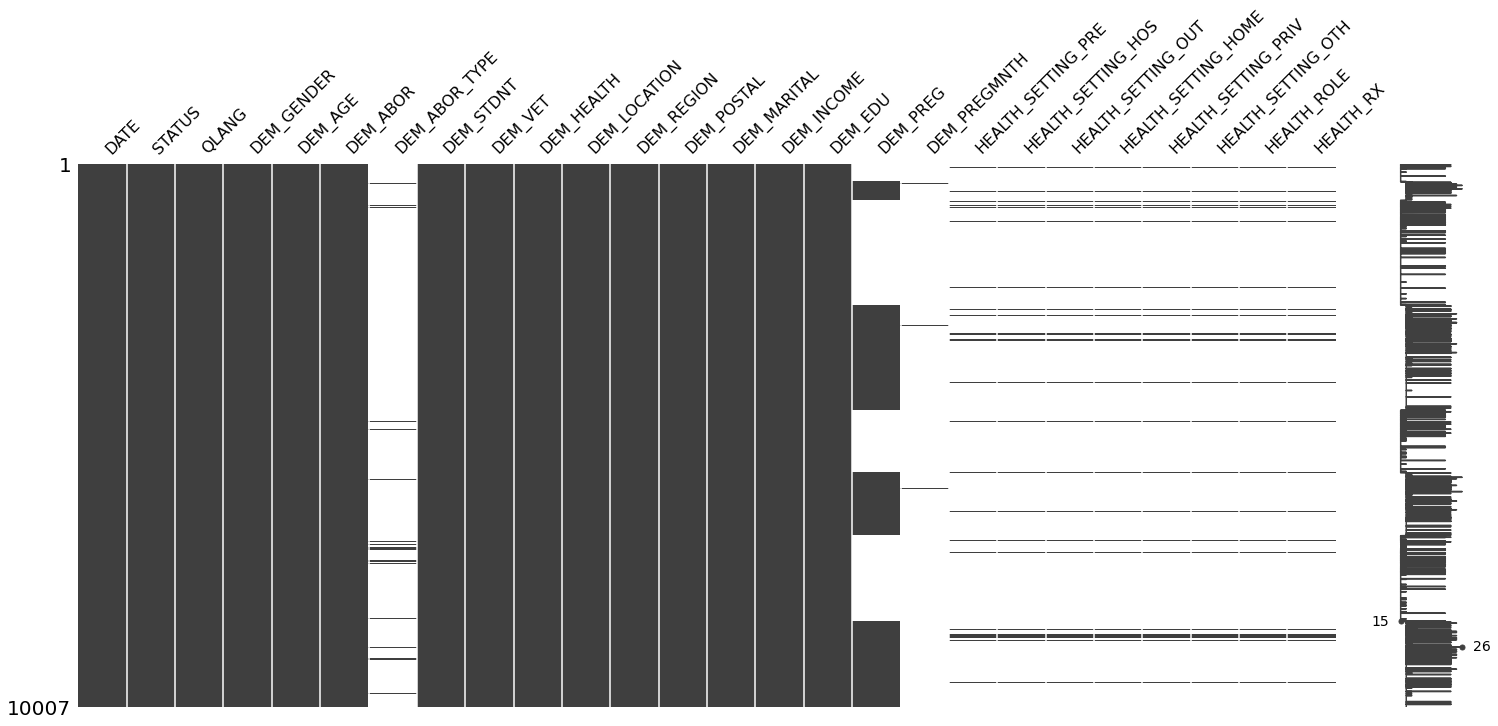

In [10]:
msno.matrix(df_dem)

In [11]:
# chronic pain lasts > 3mo
# acute pain lasts < 3mo
pain_qs = {'PAIN_CHRONIC': '55. Have you suffered from chronic pain?',
          'PAIN_CHRONIC_DOC': '56. Have you visited a healthcare provider for chronic pain?',
          'PAIN_CHRONIC_RX': '57. Have you received a prescription for an opioid (pain reliever) to treat your chronic pain?',
          'PAIN_ACUTE':'58. Have you ever suffered from acute pain that required you to seek healthcare attention?',
          'PAIN_ACUTE_DOC': '59. Have you visited a healthcare provider for acute pain?',
          'PAIN_ACUTE_RX': '60. Have you received a prescription for an opioid (pain reliever) to treat your acute pain?'
          }

In [12]:
pain_qs['PAIN_ACUTE']

'58. Have you ever suffered from acute pain that required you to seek healthcare attention?'

In [13]:
CA_df['DAST_SUM'].unique()

array([ 1,  0,  5,  4,  3,  2,  9,  6,  8,  7, 10])

In [14]:
CA_df.head()

,DATE,STATUS,QLANG,DEM_GENDER,DEM_AGE,DEM_ABOR,DEM_ABOR_TYPE,DEM_STDNT,DEM_VET,DEM_HEALTH,...,FENT_NMU_NTY,HYD_NMU_NTY,HYDM_NMU_NTY,METH_NMU_NTY,MORPH_NMU_NTY,OXY_NMU_NTY,OXYM_NMU_NTY,SUF_NMU_NTY,TAP_NMU_NTY,TRAM_NMU_NTY
0,2017-09-28 18:13:25,3,1,1,18,0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-10-18 18:46:34,3,1,1,18,0,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-09-29 06:58:50,3,1,1,24,0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-10-03 17:58:19,3,1,1,16,0,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-10-25 21:09:49,3,1,1,21,0,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# pain_df = CA_df.copy()
cols_to_keep + list(pain_qs.keys())

['DATE',
 'STATUS',
 'QLANG',
 'DEM_GENDER',
 'DEM_AGE',
 'DEM_ABOR',
 'DEM_ABOR_TYPE',
 'DEM_STDNT',
 'DEM_VET',
 'DEM_HEALTH',
 'DEM_LOCATION',
 'DEM_REGION',
 'DEM_POSTAL',
 'DEM_MARITAL',
 'DEM_INCOME',
 'DEM_EDU',
 'DEM_PREG',
 'DEM_PREGMNTH',
 'HEALTH_SETTING_PRE',
 'HEALTH_SETTING_HOS',
 'HEALTH_SETTING_OUT',
 'HEALTH_SETTING_HOME',
 'HEALTH_SETTING_PRIV',
 'HEALTH_SETTING_OTH',
 'HEALTH_ROLE',
 'HEALTH_RX',
 'PAIN_CHRONIC',
 'PAIN_CHRONIC_DOC',
 'PAIN_CHRONIC_RX',
 'PAIN_ACUTE',
 'PAIN_ACUTE_DOC',
 'PAIN_ACUTE_RX']

In [16]:
CA_df['PAIN_CHRONIC_Y_N'] = CA_df['PAIN_CHRONIC']
CA_df['PAIN_CHRONIC_Y_N'] = CA_df['PAIN_CHRONIC_Y_N'].replace([1,2,3,4,5], [0,1,1,1,1])
CA_df['PAIN_CHRONIC_Y_N'].unique()

array([0, 1])

In [17]:
pain_df = CA_df.groupby('PAIN_CHRONIC_Y_N')[['OP_NMU_EVER',
                                             'BENZ_NMU_EVER',
                                             'STIM_NMU_EVER',
                                             'GABA_NMU_EVER']].mean()
pain_df

,OP_NMU_EVER,BENZ_NMU_EVER,STIM_NMU_EVER,GABA_NMU_EVER
PAIN_CHRONIC_Y_N,,,,
0,0.273257,0.014564,0.013654,0.010377
1,0.329641,0.023704,0.019273,0.053389


In [18]:
pain_df.transpose().reset_index()

PAIN_CHRONIC_Y_N,index,0,1
0,OP_NMU_EVER,0.273257,0.329641
1,BENZ_NMU_EVER,0.014564,0.023704
2,STIM_NMU_EVER,0.013654,0.019273
3,GABA_NMU_EVER,0.010377,0.053389


In [19]:
pain_df_2 = pain_df.transpose().reset_index().rename({0:'frequency_NO', 
                                                      1:'frequency_YES',
                                                     'index':'drug_NMU_EVER'},
                                                    axis = 'columns')

In [20]:
pain_df_2

PAIN_CHRONIC_Y_N,drug_NMU_EVER,frequency_NO,frequency_YES
0,OP_NMU_EVER,0.273257,0.329641
1,BENZ_NMU_EVER,0.014564,0.023704
2,STIM_NMU_EVER,0.013654,0.019273
3,GABA_NMU_EVER,0.010377,0.053389


In [21]:
pain_df_2['diff'] = 100* (pain_df_2['frequency_YES'] - pain_df_2['frequency_NO'])

<BarContainer object of 4 artists>

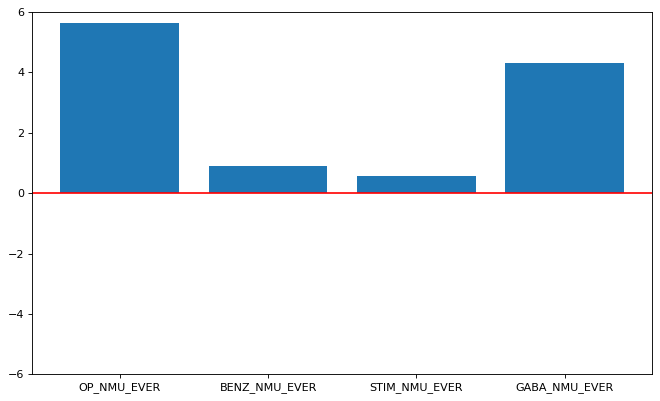

In [22]:
figure(figsize=(10, 6), dpi=80)
plt.ylim([-6, 6])
plt.axhline(y=0, color='r', linestyle='-')
plt.bar('drug_NMU_EVER', 'diff', data = pain_df_2)

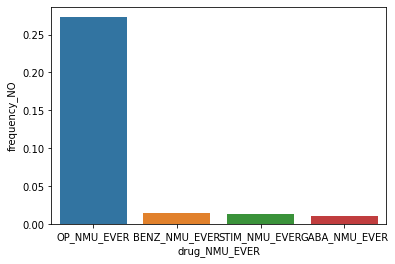

In [23]:
sns.barplot(x='drug_NMU_EVER',
            y="frequency_NO",
            data=pain_df_2)

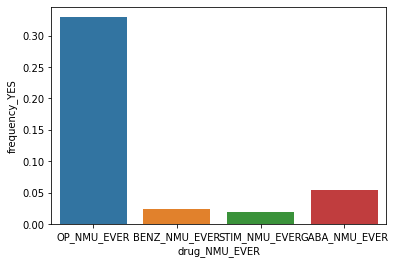

In [24]:
sns.barplot(x='drug_NMU_EVER',
            y="frequency_YES",
            data=pain_df_2)

In [25]:
pain_df

,OP_NMU_EVER,BENZ_NMU_EVER,STIM_NMU_EVER,GABA_NMU_EVER
PAIN_CHRONIC_Y_N,,,,
0,0.273257,0.014564,0.013654,0.010377
1,0.329641,0.023704,0.019273,0.053389


In [26]:
no_pain = pain_df.iloc[0].to_frame().reset_index()
no_pain['PAIN_CHRONIC_Y_N'] = 0
no_pain

,index,0,PAIN_CHRONIC_Y_N
0,OP_NMU_EVER,0.273257,0
1,BENZ_NMU_EVER,0.014564,0
2,STIM_NMU_EVER,0.013654,0
3,GABA_NMU_EVER,0.010377,0


In [27]:
yes_pain = pain_df.iloc[1].to_frame().reset_index().rename({1:0},
                                                    axis = 'columns')
yes_pain['PAIN_CHRONIC_Y_N'] = 1
yes_pain

,index,0,PAIN_CHRONIC_Y_N
0,OP_NMU_EVER,0.329641,1
1,BENZ_NMU_EVER,0.023704,1
2,STIM_NMU_EVER,0.019273,1
3,GABA_NMU_EVER,0.053389,1


In [28]:
pain_sns = no_pain.append(yes_pain)

In [29]:
pain_sns

,index,0,PAIN_CHRONIC_Y_N
0,OP_NMU_EVER,0.273257,0
1,BENZ_NMU_EVER,0.014564,0
2,STIM_NMU_EVER,0.013654,0
3,GABA_NMU_EVER,0.010377,0
0,OP_NMU_EVER,0.329641,1
1,BENZ_NMU_EVER,0.023704,1
2,STIM_NMU_EVER,0.019273,1
3,GABA_NMU_EVER,0.053389,1


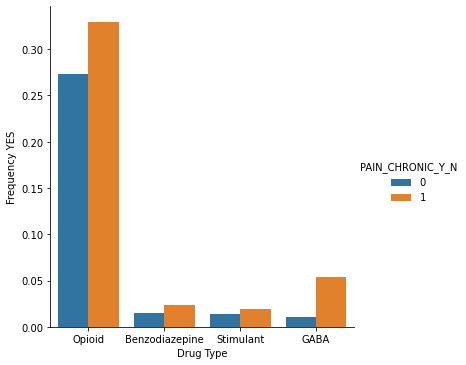

In [30]:
g = sns.catplot(x = 'index',
                y = 0,
                hue = 'PAIN_CHRONIC_Y_N',
                kind = 'bar',
                data = pain_sns)
(g.set_axis_labels('Drug Type', 'Frequency YES')
  .set_xticklabels(['Opioid', 'Benzodiazepine', 'Stimulant', 'GABA'])
  .set_titles("{col_name} {col_var}")
)  
# are these differences statistically significant?

In [31]:
base_df = CA_df.groupby('PAIN_CHRONIC_Y_N')[['CAN_REC_USE',
                                             'COKE_USE',
                                             'CRACK_USE',
                                             'MDMA_USE',
                                             'GHB_USE',
                                             'HAL_USE',
                                             'INH_USE',
                                             'SPEED_USE',
                                             'NPFENT_USE',
                                             'HEROIN_USE',
                                             'KET_USE',
                                             'MEPH_USE',
                                             'SPICE_USE',
                                             'SAL_USE',
                                             'STER_USE',]].mean()
base_df

,CAN_REC_USE,COKE_USE,CRACK_USE,MDMA_USE,GHB_USE,HAL_USE,INH_USE,SPEED_USE,NPFENT_USE,HEROIN_USE,KET_USE,MEPH_USE,SPICE_USE,SAL_USE,STER_USE
PAIN_CHRONIC_Y_N,,,,,,,,,,,,,,,
0,2.014382,1.260149,1.063900,1.190788,1.062807,1.370107,1.046423,1.153832,1.015292,1.033315,1.043328,1.011287,1.009102,1.059712,1.022392
1,2.370403,1.529685,1.212229,1.348250,1.146876,1.698715,1.139123,1.293753,1.082189,1.137794,1.176340,1.121179,1.101905,1.149756,1.106336


In [32]:
def flip_pain(x):
    no_pain = x.iloc[0].to_frame().reset_index()
    no_pain['PAIN_CHRONIC_Y_N'] = 0
    yes_pain = x.iloc[1].to_frame().reset_index().rename({1:0},axis = 'columns')
    yes_pain['PAIN_CHRONIC_Y_N'] = 1
    return no_pain.append(yes_pain)

In [33]:
drug_use = flip_pain(base_df)
drug_use

,index,0,PAIN_CHRONIC_Y_N
0,CAN_REC_USE,2.014382,0
1,COKE_USE,1.260149,0
2,CRACK_USE,1.063900,0
3,MDMA_USE,1.190788,0
4,GHB_USE,1.062807,0
5,HAL_USE,1.370107,0
6,INH_USE,1.046423,0
7,SPEED_USE,1.153832,0
8,NPFENT_USE,1.015292,0
9,HEROIN_USE,1.033315,0


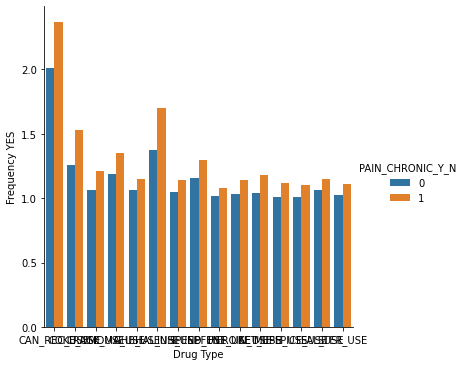

In [34]:
g = sns.catplot(x = 'index',
                y = 0,
                hue = 'PAIN_CHRONIC_Y_N',
                kind = 'bar',
                data = drug_use)
(g.set_axis_labels('Drug Type', 'Frequency YES')
  .set_titles("{col_name} {col_var}")
)  

---

### df manipulation for autism visualization in R!

In [35]:
df_ment = CA_df.copy()
df_ment = df_ment[['MENT_ANX',
                   'MENT_ADHD',
                   'MENT_AUT',
                   'MENT_BIP',
                   'MENT_BPD',
                   'MENT_DEP',
                   'MENT_EAT',
                   'MENT_OCD',
                   'MENT_PANIC',
                   'MENT_PPD',
                   'MENT_PTSD',
                   'MENT_SCH',
                   'MENT_OTH',
                   'MENT_NONE',
                   'DAST_SUM',
                   'DAST_CAT'
                  ]]

df_ment = CA_df.groupby('MENT_AUT')[['DAST_SUM',
                                     'DAST_CAT']].mean()
df_ment

,DAST_SUM,DAST_CAT
MENT_AUT,,
0,0.828849,1.591544
1,2.388430,2.280992


In [36]:
def flip_var(x, var):
    no_var = x.iloc[0].to_frame().reset_index()
    no_var[var] = 0
    yes_var = x.iloc[1].to_frame().reset_index().rename({1:0},axis = 'columns')
    yes_var[var] = 1
    return no_var.append(yes_var)

In [37]:
aut_df = flip_var(df_ment, 'MENT_AUT')

In [38]:
aut_df

,index,0,MENT_AUT
0,DAST_SUM,0.828849,0
1,DAST_CAT,1.591544,0
0,DAST_SUM,2.388430,1
1,DAST_CAT,2.280992,1


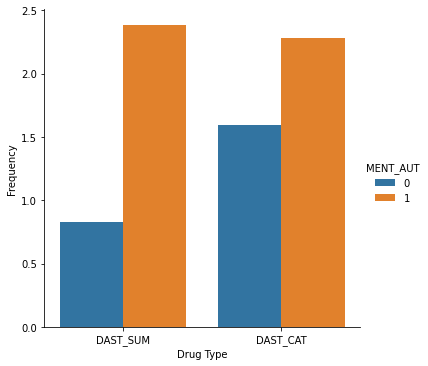

In [39]:
g = sns.catplot(x = 'index',
                y = 0,
                hue = 'MENT_AUT',
                kind = 'bar',
                data = aut_df)
(g.set_axis_labels('Drug Type', 'Frequency')
  .set_titles("{col_name} {col_var}")
)  

In [40]:
conditions_to_aggregate = ['MENT_ANX',
                           'MENT_ADHD',
                           'MENT_AUT',
                           'MENT_BIP',
                           'MENT_BPD',
                           'MENT_DEP',
                           'MENT_EAT',
                           'MENT_OCD',
                           'MENT_PANIC',
                           'MENT_PPD',
                           'MENT_PTSD',
                            'MENT_SCH',
                           'MENT_OTH',
                           'MENT_NONE',
                          ]

In [41]:
CA_df[['MENT_ANX','DAST_SUM']].groupby(['MENT_ANX','DAST_SUM']).size().to_frame().reset_index()


,MENT_ANX,DAST_SUM,0
0,0,0,4131
1,0,1,2808
2,0,2,415
3,0,3,155
4,0,4,147
5,0,5,63
6,0,6,39
7,0,7,31
8,0,8,17
9,0,9,18


In [42]:
df1 = CA_df.groupby('DAST_SUM')['MENT_ANX'].sum().to_frame().reset_index()
df1

,DAST_SUM,MENT_ANX
0,0,919
1,1,734
2,2,210
3,3,110
4,4,63
5,5,44
6,6,34
7,7,24
8,8,15
9,9,20


In [43]:
df2 = CA_df.groupby('DAST_SUM')['MENT_EAT'].sum().to_frame().reset_index()

In [44]:
df1.merge(df2)

,DAST_SUM,MENT_ANX,MENT_EAT
0,0,919,93
1,1,734,70
2,2,210,22
3,3,110,15
4,4,63,31
5,5,44,12
6,6,34,8
7,7,24,3
8,8,15,1
9,9,20,1


In [45]:
ment_df = CA_df.groupby('DAST_SUM')['MENT_ANX'].sum().to_frame().reset_index()
def merge_conditions(i,temp):
    df = CA_df.groupby('DAST_SUM')[conditions_to_aggregate[i]].sum().to_frame().reset_index()
    return temp.merge(df)
    
for i in range(1,len(conditions_to_aggregate)):
    ment_df = merge_conditions(i, ment_df)
    

In [46]:
ment_df

,DAST_SUM,MENT_ANX,MENT_ADHD,MENT_AUT,MENT_BIP,MENT_BPD,MENT_DEP,MENT_EAT,MENT_OCD,MENT_PANIC,MENT_PPD,MENT_PTSD,MENT_SCH,MENT_OTH,MENT_NONE
0,0,919,133,35,86,58,1028,93,92,178,93,141,37,59,3562
1,1,734,107,25,62,48,718,70,85,159,63,98,22,41,2446
2,2,210,44,6,48,23,224,22,28,52,17,39,6,17,299
3,3,110,32,15,26,20,105,15,24,29,9,24,8,5,91
4,4,63,12,15,41,49,86,31,24,37,15,31,12,4,47
5,5,44,23,11,17,19,49,12,12,9,6,11,5,5,24
6,6,34,7,8,12,11,41,8,12,17,4,14,0,1,15
7,7,24,5,4,7,8,25,3,6,5,3,7,1,1,20
8,8,15,5,2,3,5,16,1,4,5,1,1,2,0,7
9,9,20,7,0,5,6,20,1,2,2,3,6,0,0,15


In [47]:
totals = {}
for condition in conditions_to_aggregate:
    totals[condition] = CA_df[condition].sum() - sum(CA_df[condition].isna())

In [48]:
totals

{'MENT_ANX': 2180,
 'MENT_ADHD': 378,
 'MENT_AUT': 121,
 'MENT_BIP': 308,
 'MENT_BPD': 248,
 'MENT_DEP': 2315,
 'MENT_EAT': 259,
 'MENT_OCD': 290,
 'MENT_PANIC': 495,
 'MENT_PPD': 215,
 'MENT_PTSD': 373,
 'MENT_SCH': 93,
 'MENT_OTH': 133,
 'MENT_NONE': 6529}

In [49]:
for condition in conditions_to_aggregate:
    ment_df[condition+'_REL'] = ment_df[condition] / totals[condition]

In [50]:
ment_df

,DAST_SUM,MENT_ANX,MENT_ADHD,MENT_AUT,MENT_BIP,MENT_BPD,MENT_DEP,MENT_EAT,MENT_OCD,MENT_PANIC,...,MENT_BPD_REL,MENT_DEP_REL,MENT_EAT_REL,MENT_OCD_REL,MENT_PANIC_REL,MENT_PPD_REL,MENT_PTSD_REL,MENT_SCH_REL,MENT_OTH_REL,MENT_NONE_REL
0,0,919,133,35,86,58,1028,93,92,178,...,0.233871,0.444060,0.359073,0.317241,0.359596,0.432558,0.378016,0.397849,0.443609,0.545566
1,1,734,107,25,62,48,718,70,85,159,...,0.193548,0.310151,0.270270,0.293103,0.321212,0.293023,0.262735,0.236559,0.308271,0.374636
2,2,210,44,6,48,23,224,22,28,52,...,0.092742,0.096760,0.084942,0.096552,0.105051,0.079070,0.104558,0.064516,0.127820,0.045796
3,3,110,32,15,26,20,105,15,24,29,...,0.080645,0.045356,0.057915,0.082759,0.058586,0.041860,0.064343,0.086022,0.037594,0.013938
4,4,63,12,15,41,49,86,31,24,37,...,0.197581,0.037149,0.119691,0.082759,0.074747,0.069767,0.083110,0.129032,0.030075,0.007199
5,5,44,23,11,17,19,49,12,12,9,...,0.076613,0.021166,0.046332,0.041379,0.018182,0.027907,0.029491,0.053763,0.037594,0.003676
6,6,34,7,8,12,11,41,8,12,17,...,0.044355,0.017711,0.030888,0.041379,0.034343,0.018605,0.037534,0.000000,0.007519,0.002297
7,7,24,5,4,7,8,25,3,6,5,...,0.032258,0.010799,0.011583,0.020690,0.010101,0.013953,0.018767,0.010753,0.007519,0.003063
8,8,15,5,2,3,5,16,1,4,5,...,0.020161,0.006911,0.003861,0.013793,0.010101,0.004651,0.002681,0.021505,0.000000,0.001072
9,9,20,7,0,5,6,20,1,2,2,...,0.024194,0.008639,0.003861,0.006897,0.004040,0.013953,0.016086,0.000000,0.000000,0.002297


In [51]:
ment_df.sum()

DAST_SUM            55.0
MENT_ANX          2180.0
MENT_ADHD          378.0
MENT_AUT           121.0
MENT_BIP           308.0
MENT_BPD           248.0
MENT_DEP          2315.0
MENT_EAT           259.0
MENT_OCD           290.0
MENT_PANIC         495.0
MENT_PPD           215.0
MENT_PTSD          373.0
MENT_SCH            93.0
MENT_OTH           133.0
MENT_NONE         6529.0
MENT_ANX_REL         1.0
MENT_ADHD_REL        1.0
MENT_AUT_REL         1.0
MENT_BIP_REL         1.0
MENT_BPD_REL         1.0
MENT_DEP_REL         1.0
MENT_EAT_REL         1.0
MENT_OCD_REL         1.0
MENT_PANIC_REL       1.0
MENT_PPD_REL         1.0
MENT_PTSD_REL        1.0
MENT_SCH_REL         1.0
MENT_OTH_REL         1.0
MENT_NONE_REL        1.0
dtype: float64

In [52]:
ment_df['DAST_CAT'] = ment_df['DAST_SUM'].apply(lambda x: 'None reported' if x == 0
                                                else 'Low level' if x <= 2
                                                else 'Moderate level' if x <= 5
                                                else 'Substantial level' if x <= 8
                                                else 'Severe level')

In [53]:
ment_df

,DAST_SUM,MENT_ANX,MENT_ADHD,MENT_AUT,MENT_BIP,MENT_BPD,MENT_DEP,MENT_EAT,MENT_OCD,MENT_PANIC,...,MENT_DEP_REL,MENT_EAT_REL,MENT_OCD_REL,MENT_PANIC_REL,MENT_PPD_REL,MENT_PTSD_REL,MENT_SCH_REL,MENT_OTH_REL,MENT_NONE_REL,DAST_CAT
0,0,919,133,35,86,58,1028,93,92,178,...,0.444060,0.359073,0.317241,0.359596,0.432558,0.378016,0.397849,0.443609,0.545566,None reported
1,1,734,107,25,62,48,718,70,85,159,...,0.310151,0.270270,0.293103,0.321212,0.293023,0.262735,0.236559,0.308271,0.374636,Low level
2,2,210,44,6,48,23,224,22,28,52,...,0.096760,0.084942,0.096552,0.105051,0.079070,0.104558,0.064516,0.127820,0.045796,Low level
3,3,110,32,15,26,20,105,15,24,29,...,0.045356,0.057915,0.082759,0.058586,0.041860,0.064343,0.086022,0.037594,0.013938,Moderate level
4,4,63,12,15,41,49,86,31,24,37,...,0.037149,0.119691,0.082759,0.074747,0.069767,0.083110,0.129032,0.030075,0.007199,Moderate level
5,5,44,23,11,17,19,49,12,12,9,...,0.021166,0.046332,0.041379,0.018182,0.027907,0.029491,0.053763,0.037594,0.003676,Moderate level
6,6,34,7,8,12,11,41,8,12,17,...,0.017711,0.030888,0.041379,0.034343,0.018605,0.037534,0.000000,0.007519,0.002297,Substantial level
7,7,24,5,4,7,8,25,3,6,5,...,0.010799,0.011583,0.020690,0.010101,0.013953,0.018767,0.010753,0.007519,0.003063,Substantial level
8,8,15,5,2,3,5,16,1,4,5,...,0.006911,0.003861,0.013793,0.010101,0.004651,0.002681,0.021505,0.000000,0.001072,Substantial level
9,9,20,7,0,5,6,20,1,2,2,...,0.008639,0.003861,0.006897,0.004040,0.013953,0.016086,0.000000,0.000000,0.002297,Severe level


In [54]:
ment_df.to_csv('ment_df.csv')

---

TRYING AGAIN BUT BETTER:

---

In [55]:
ment_df1 = CA_df[['MENT_ANX',
                  'DAST_SUM']].groupby(['MENT_ANX','DAST_SUM']).size().to_frame().reset_index().rename({0: 'MENT_ANX_FREQ'}, axis = 'columns')
def merge_conditions(i,temp):
    df = CA_df[[conditions_to_aggregate[i],'DAST_SUM']].groupby([conditions_to_aggregate[i],'DAST_SUM']).size().to_frame().reset_index().rename({0: conditions_to_aggregate[i]+'_FREQ'}, axis = 'columns')
    return temp.merge(df)
    
for i in range(1,len(conditions_to_aggregate)):
    ment_df1 = merge_conditions(i, ment_df)
    

ment_df1

'''totals = {}
for condition in conditions_to_aggregate:
    totals[condition] = CA_df[condition].sum() - sum(CA_df[condition].isna())

totals

for condition in conditions_to_aggregate:
    ment_df[condition+'_REL'] = ment_df[condition] / totals[condition]

ment_df

ment_df.sum()

ment_df['DAST_CAT'] = ment_df['DAST_SUM'].apply(lambda x: 'None reported' if x == 0
                                                else 'Low level' if x <= 2
                                                else 'Moderate level' if x <= 5
                                                else 'Substantial level' if x <= 8
                                                else 'Severe level')

ment_df
'''

"totals = {}\nfor condition in conditions_to_aggregate:\n    totals[condition] = CA_df[condition].sum() - sum(CA_df[condition].isna())\n\ntotals\n\nfor condition in conditions_to_aggregate:\n    ment_df[condition+'_REL'] = ment_df[condition] / totals[condition]\n\nment_df\n\nment_df.sum()\n\nment_df['DAST_CAT'] = ment_df['DAST_SUM'].apply(lambda x: 'None reported' if x == 0\n                                                else 'Low level' if x <= 2\n                                                else 'Moderate level' if x <= 5\n                                                else 'Substantial level' if x <= 8\n                                                else 'Severe level')\n\nment_df\n"

In [148]:
ment_df1 = US_df[['MENT_ANX','DAST_SUM']].groupby(['MENT_ANX','DAST_SUM']).size().to_frame().reset_index().rename({0: 'MENT_ANX_FREQ'}, axis = 'columns')
ment_df1

,MENT_ANX,DAST_SUM,MENT_ANX_FREQ
0,0,0,11886
1,0,1,8131
2,0,2,1060
3,0,3,411
4,0,4,204
5,0,5,137
6,0,6,119
7,0,7,76
8,0,8,56
9,0,9,108


In [149]:
df = US_df[['MENT_AUT','DAST_SUM']].groupby(['MENT_AUT','DAST_SUM']).size().to_frame().reset_index().rename({0: 'MENT_AUT_FREQ'}, axis = 'columns')
df

,MENT_AUT,DAST_SUM,MENT_AUT_FREQ
0,0,0,15055
1,0,1,10600
2,0,2,1777
3,0,3,743
4,0,4,394
5,0,5,290
6,0,6,219
7,0,7,160
8,0,8,112
9,0,9,198


In [205]:
ment_to_graph = ["MENT_ANX", "MENT_ADHD", "MENT_AUT", "MENT_DEP"]

def to_r_data(ment):
    df = US_df[[ment,'DAST_SUM']].groupby([ment,'DAST_SUM']).size().to_frame().reset_index().rename({0: ment+'_FREQ'}, axis = 'columns')
    df_copy = df.copy()
    US_df_no = df_copy.loc[df_copy[ment] == 0]
    US_df_yes = df_copy.loc[df_copy[ment] == 1]
    US_df_no[ment+'_REL_FREQ'] = US_df_no[ment + '_FREQ']/(pd.value_counts(US_df[ment])[0])
    US_df_yes[ment+'_REL_FREQ'] = US_df_yes[ment + '_FREQ']/(pd.value_counts(US_df[ment])[1])
    for_r = pd.concat([US_df_no,US_df_yes])
    return for_r

In [206]:
to_r_data('MENT_ANX').to_csv('ment_anx_df.csv')
to_r_data('MENT_ADHD').to_csv('ment_adhd_df.csv')
to_r_data('MENT_DEP').to_csv('ment_dep_df.csv')

/Users/elizabethgallmeister/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/elizabethgallmeister/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [163]:
df_copy = df.copy()
US_df_no_aut = df_copy.loc[df_copy['MENT_AUT'] == 0]
US_df_yes_aut = df_copy.loc[df_copy['MENT_AUT'] == 1]
US_df_no_aut['MENT_AUT_REL_FREQ'] = US_df_no_aut['MENT_AUT_FREQ']/29649
US_df_yes_aut['MENT_AUT_REL_FREQ'] = df['MENT_AUT_FREQ']/358

/Users/elizabethgallmeister/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/elizabethgallmeister/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [172]:
for_r = pd.concat([US_df_no_aut,US_df_yes_aut])
#df['MENT_AUT_REL_FREQ'] = df['MENT_AUT_FREQ'].apply(lambda x: x/9886 if df['MENT_AUT'] == 1 else x/121)
for_r.to_csv('aut_df.csv')

In [176]:
pd.value_counts(US_df['MENT_ADHD'])


0    28442
1     1565
Name: MENT_ADHD, dtype: int64

In [60]:
ment_df1.merge(df)

,MENT_ANX,DAST_SUM,MENT_ANX_FREQ,MENT_AUT,MENT_AUT_FREQ
0,0,0,4131,0,5015
1,0,0,4131,1,35
2,1,0,919,0,5015
3,1,0,919,1,35
4,0,1,2808,0,3517
5,0,1,2808,1,25
6,1,1,734,0,3517
7,1,1,734,1,25
8,0,2,415,0,619
9,0,2,415,1,6


In [108]:
US_df['CAN_REC_USE_EVER'] = US_df['CAN_REC_USE']
US_df['CAN_REC_USE_EVER'] = US_df['CAN_REC_USE_EVER'].replace([1,2,3,4,5], [0,1,1,1,1])
US_df['CAN_REC_USE_EVER'].unique()

array([0, 1])

In [143]:
ment_to_graph = ["MENT_ANX", "MENT_ADHD", "MENT_AUT", "MENT_DEP"]


def graph_ment(ment):
    ment_df = US_df.groupby(ment)[['CAN_REC_USE_EVER',
                                   'OP_NMU_EVER',
                                   'BENZ_NMU_EVER',
                                   'STIM_NMU_EVER',
                                   'GABA_NMU_EVER']].mean()
    ment_df_2 = ment_df.transpose().reset_index().rename({0:'frequency_NO',
                                                          1:'frequency_YES',
                                                          'index':'drug_NMU_EVER'
                                                         },
                                                         axis = 'columns')
    
    ment_df_2['diff'] = 100* (ment_df_2['frequency_YES'] - ment_df_2['frequency_NO'])
    ment_df_2['pos_diff'] = ment_df_2['diff'] >= 0
    graph_dims = round(max(ment_df_2['diff'])) + 1
    figure(figsize=(10, 6), dpi=80)
    plt.ylim([-1*graph_dims / 2, graph_dims])
    plt.axhline(y=0, color='r', linestyle='-')
    plt.bar('drug_NMU_EVER', 'diff', data = ment_df_2, color=ment_df_2.pos_diff.map({True: 'tab:blue', False: 'tab:red'}))
    plt.title(ment + ' and NMU Drug Use')

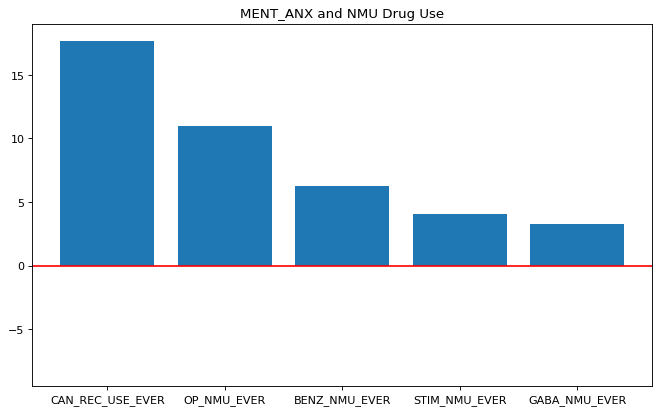

In [144]:
graph_ment(ment_to_graph[0])

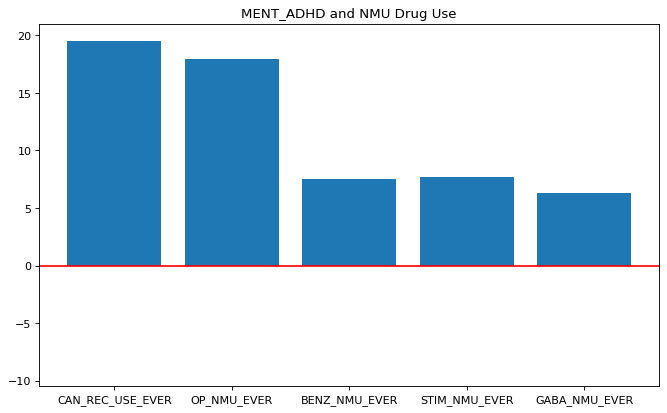

In [145]:
graph_ment(ment_to_graph[1])

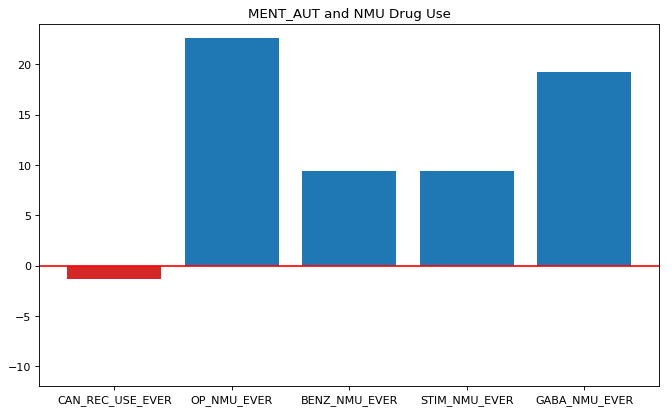

In [146]:
graph_ment(ment_to_graph[2])

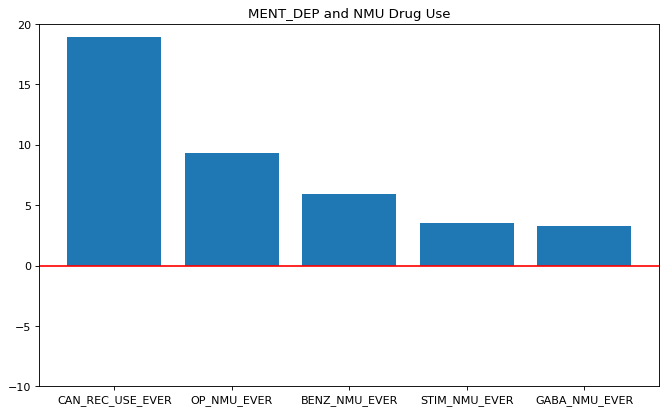

In [147]:
graph_ment(ment_to_graph[3])